In [1]:
#Import all the Neccessary things to workspace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import all the csv files as dataframes
df1 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_2NAICS_00_05.csv")
df2 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_2NAICS_06_10.csv")
df3 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_2NAICS_11_15.csv")
df4 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_2NAICS_16_20.csv")
df5 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_2NAICS_97_99.csv")
df6 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_3NAICS_00_05.csv")
df7 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_3NAICS_06_10.csv")
df8 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_3NAICS_11_15.csv")
df9 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_3NAICS_16_20.csv")
df10 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_3NAICS_97_99.csv")
df11 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_4NAICS_00_05.csv")
df12 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_4NAICS_06_10.csv")
df13 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_4NAICS_11_15.csv")
df14 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_4NAICS_16_20.csv")
df15 = pd.read_csv(r"C:\Users\Yosef\Downloads\DATA Analyst\RTRA_Employ_4NAICS_97_99.csv")
#Import the excel files too. 
do = pd.read_excel(r"C:\Users\Yosef\Downloads\DATA Analyst\Data_Output_Template.xlsx")
lmo = pd.read_excel(r"C:\Users\Yosef\Downloads\DATA Analyst\LMO_Detailed_Industries_by_NAICS.xlsx")

In [3]:
lmo['NAICS'] = lmo['NAICS'].replace({'&':','}, regex=True)

In [4]:
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [5]:
lmo=lmo[['NAICS','LMO_Detailed_Industry']]

In [6]:
lmo.head()

,NAICS,LMO_Detailed_Industry
0,"111 , 112",Farms
1,114,"Fishing, hunting and trapping"
2,113,Forestry and logging
3,115,Support activities for agriculture and forestry
4,211,Oil and gas extraction


In [7]:
#Let us Separately place one code in one row...first those with only one code selected as follows
lmo1= lmo[~lmo['NAICS'].str.contains(',', na=False)]

In [8]:
lmo1.head()

,NAICS,LMO_Detailed_Industry
1,114,"Fishing, hunting and trapping"
2,113,Forestry and logging
3,115,Support activities for agriculture and forestry
4,211,Oil and gas extraction
5,213,Support activities for mining and oil and gas ...


In [9]:
#Let us Separately place one code in one row...second those with more than one code and separated by comma selected as follows.
lmo2= lmo[lmo['NAICS'].str.contains(',', na=False)]

In [10]:
lmo2.head()

,NAICS,LMO_Detailed_Industry
0,"111 , 112",Farms
9,"311 , 312","Food, beverage and tobacco manufacturing"
16,"3361, 3362, 3363, 3364, 3365, 3369",Transportation equipment manufacturing (exclud...
17,"313, 314, 315, 316, 323, 324, 325, 326, 327, 3...",Other manufacturing
21,"442,443,444,445,446,447,448,451,452,453 , 454",Other retail trade (excluding cars and persona...


In [11]:
lmo2= lmo2.assign(NAICS=lmo2['NAICS'].str.split(',')).explode('NAICS')

In [12]:
lmo2.head()

,NAICS,LMO_Detailed_Industry
0,111,Farms
0,112,Farms
9,311,"Food, beverage and tobacco manufacturing"
9,312,"Food, beverage and tobacco manufacturing"
16,3361,Transportation equipment manufacturing (exclud...


In [13]:
lmo_final = lmo1.append(lmo2)

In [14]:
lmo_final.head()

,NAICS,LMO_Detailed_Industry
1,114,"Fishing, hunting and trapping"
2,113,Forestry and logging
3,115,Support activities for agriculture and forestry
4,211,Oil and gas extraction
5,213,Support activities for mining and oil and gas ...


In [15]:
#create three separate dataframes for 2, 3 and 4 digits of NAICS
NAICS_2 = df1.append([df2, df3, df4, df5])
NAICS_3 = df6.append([df7, df8, df9, df10])
NAICS_4 = df11.append([df12, df13, df14, df15])

In [16]:
#Update the column of each of the three dataframes by extracting NAICS_CODE from the string NAICS...2nd digit categories 1st
NAICS_2['NAICS_C'] = NAICS_2.NAICS.str.split('[').map(lambda x: x[1].strip(']'))

In [17]:
NAICS_2.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_C
0,2000,1,Accommodation and food services [72],148000,72
1,2000,1,"Administrative and support, waste management a...",59250,56
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11
3,2000,1,"Arts, entertainment and recreation [71]",39500,71
4,2000,1,Construction [23],106250,23


In [18]:
#Extract NAICS Code for the 3rd digit categories
NAICS_3['NAICS_C'] = NAICS_3.NAICS.str.split('[').map(lambda x: x[-1].strip(']'))

In [19]:
NAICS_3.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_C
0,2000,1,Aboriginal public administration[914],500,914
1,2000,1,Accommodation services[721],33750,721
2,2000,1,Administrative and support services[561],55250,561
3,2000,1,Air transportation[481],17500,481
4,2000,1,Ambulatory health care services[621],53000,621


In [20]:
#Extract NAICS Code for the 4th digit categories
NAICS_4['NAICS_C'] = NAICS_4.NAICS.apply(str).str.split('[').map(lambda x: x[0].strip(']'))

In [21]:
NAICS_4.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_C
0,2000,1,1100,500,1100
1,2000,1,1111,0,1111
2,2000,1,1112,2000,1112
3,2000,1,1113,250,1113
4,2000,1,1114,7750,1114


In [22]:
#Append all the three separate NAICS Code Categories with their respective Employment Data as foll
NAICS_NEW = NAICS_2.append([NAICS_3, NAICS_4])

In [23]:
NAICS_NEW.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_C
0,2000,1,Accommodation and food services [72],148000,72
1,2000,1,"Administrative and support, waste management a...",59250,56
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11
3,2000,1,"Arts, entertainment and recreation [71]",39500,71
4,2000,1,Construction [23],106250,23


In [24]:
#Let us rename the column NAICS in to LMO_Detailed_Industry.
NAICS_NEW = NAICS_NEW.rename(columns= {'NAICS':'LMO_Detailed_Industry'})
NAICS_NEW = NAICS_NEW.rename(columns= {'NAICS_C':'NAICS'})

In [25]:
NAICS_NEW.isnull().sum()

SYEAR                    0
SMTH                     0
LMO_Detailed_Industry    0
_EMPLOYMENT_             0
NAICS                    0
dtype: int64

In [26]:
do.head()
len(do.LMO_Detailed_Industry.unique())

59

In [27]:
lmo_final.head()
len(lmo_final.NAICS.unique())

107

In [28]:
do_lmo = do.merge(lmo_final, on = ('LMO_Detailed_Industry'), how = 'left')

In [29]:

len(do_lmo.LMO_Detailed_Industry.unique())

59

In [30]:
do_lmo.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS
0,1997,1,Accommodation services,NaN,721
1,1997,1,Air transportation,NaN,481
2,1997,1,Ambulatory health care services,NaN,621
3,1997,1,"Amusement, gambling and recreation industries",NaN,713
4,1997,1,"Architectural, engineering and related services",NaN,5413


In [31]:
f_df=do_lmo.merge(NAICS_NEW, on = (['LMO_Detailed_Industry', 'NAICS', 'SYEAR', 'SMTH']), how = 'right')

In [32]:
f_df.head(10)

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],NaN,72,148000
1,2000,1,"Administrative and support, waste management a...",NaN,56,59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",NaN,11,61750
3,2000,1,"Arts, entertainment and recreation [71]",NaN,71,39500
4,2000,1,Construction [23],NaN,23,106250
5,2000,1,Educational services [61],NaN,61,143500
6,2000,1,Finance and insurance [52],NaN,52,78500
7,2000,1,Health care and social assistance [62],NaN,62,200000
8,2000,1,Information and cultural industries [51],NaN,51,47000
9,2000,1,Management of companies and enterprises [55],NaN,55,1000


In [33]:
f_df.isna().sum()

SYEAR                         0
SMTH                          0
LMO_Detailed_Industry         0
Employment               119184
NAICS                         0
_EMPLOYMENT_                  0
dtype: int64

In [34]:
#No need to have similar name of columns in the same data frame...remove using drop()
f_df.drop('Employment',inplace=True, axis=1)
#Let us rename the column _EMPLOYMENT_ with Employment
f_df = f_df.rename(columns= {'_EMPLOYMENT_':'Employment'})

In [35]:
 f_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,NAICS,Employment
0,2000,1,Accommodation and food services [72],72,148000
1,2000,1,"Administrative and support, waste management a...",56,59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",11,61750
3,2000,1,"Arts, entertainment and recreation [71]",71,39500
4,2000,1,Construction [23],23,106250


In [36]:
#Let us plot a line graph for arts entertainment and recration jobs
aer = f_df[f_df.NAICS == '71']
aer.head()

,SYEAR,SMTH,LMO_Detailed_Industry,NAICS,Employment
3,2000,1,"Arts, entertainment and recreation [71]",71,39500
23,2000,2,"Arts, entertainment and recreation [71]",71,41250
43,2000,3,"Arts, entertainment and recreation [71]",71,44500
63,2000,4,"Arts, entertainment and recreation [71]",71,40000
83,2000,5,"Arts, entertainment and recreation [71]",71,41250


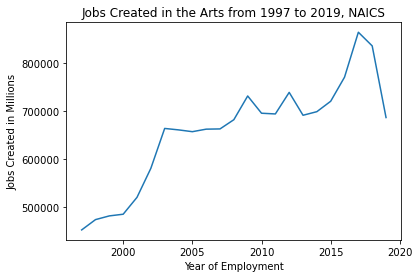

In [37]:
aer_line = aer.groupby('SYEAR')['Employment'].sum()
aer_line.plot()
plt.xlabel("Year of Employment")
plt.ylabel("Jobs Created in Millions")
plt.title("Jobs Created in the Arts from 1997 to 2019, NAICS")
plt.show()

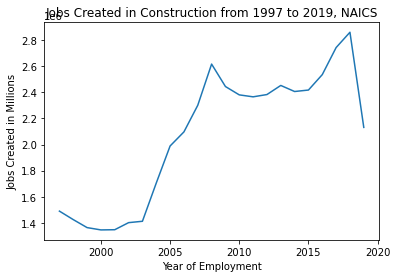

In [38]:
#Let us plot a line graph for Construction jobs
con = f_df[f_df.NAICS == '23']
con_g = con.groupby('SYEAR')['Employment'].sum()
con_g.plot()
plt.xlabel("Year of Employment")
plt.ylabel("Jobs Created in Millions")
plt.title("Jobs Created in Construction from 1997 to 2019, NAICS")
plt.show()

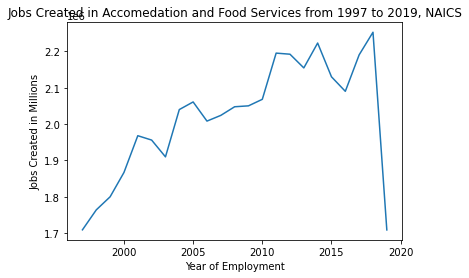

In [39]:
#Let us plot a line graph for Accomedation and Food Services
afs = f_df[f_df.NAICS == '72']
afs_g = afs.groupby('SYEAR')['Employment'].sum()
afs_g.plot()
plt.xlabel("Year of Employment")
plt.ylabel("Jobs Created in Millions")
plt.title("Jobs Created in Accomedation and Food Services from 1997 to 2019, NAICS")
plt.show()

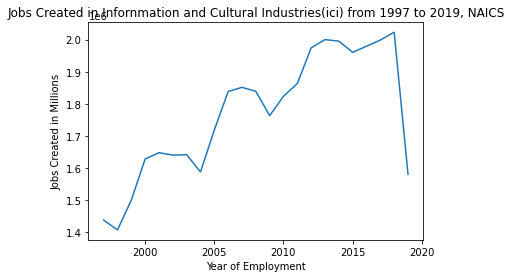

In [40]:
#Let us plot a line graph for Infornmation and Cultural Industries(ici)
ici = f_df[f_df.NAICS == '61']
ici_g = ici.groupby('SYEAR')['Employment'].sum()
ici_g.plot()
plt.xlabel("Year of Employment")
plt.ylabel("Jobs Created in Millions")
plt.title("Jobs Created in Infornmation and Cultural Industries(ici) from 1997 to 2019, NAICS")
plt.show()

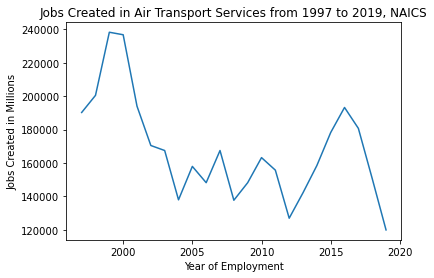

In [41]:
#Let us plot a line graph for Air Transport Services
air_t = f_df[f_df.NAICS == '481']
air_t_g = air_t.groupby('SYEAR')['Employment'].sum()
air_t_g.plot()
plt.xlabel("Year of Employment")
plt.ylabel("Jobs Created in Millions")
plt.title("Jobs Created in Air Transport Services from 1997 to 2019, NAICS")
plt.show()